In [1]:
%matplotlib inline
import jplus
import os
import pickle
import elgtools as elg
import numpy as np
import matplotlib.pyplot as plt
import Read_Mocks as read
import MockJPLUS as mtools
import matplotlib.gridspec as gsc

Mockpath = '/home/CEFCA/aaorsi/work/JPLUS_Mock/'
namelc   = 'LightCone_SA_0_'

plt.rcParams['figure.figsize'] = 25, 25


In [2]:
# Loading SDSS data first

Load_coords = True
Load_ri     = True
Load_ugz    = True
Load_ri_err = True

if Load_coords:
    gal_sdss_coords  = jplus.datasets.fetch_custom_sdss(mag_type="none",overwrite=False,mag_limit=[16,21], extinction=False,
                                                          clean = True, nchunks = 10, spectroscopic=False, 
                                                    casjobs=True, object_name="photgalaxies",get_r=False, get_i=False,
                                                    runname='coords', get_coords=True) 
    id_obj = np.argsort(gal_sdss_coords['object_id'])
    gal_sdss_coords['object_id'] = gal_sdss_coords['object_id'][id_obj]
    gal_sdss_coords['coords'] = gal_sdss_coords['coords'][id_obj,:]
    print 'SDSS coordinates loaded'
    
if Load_ri:
    gal_sdss_r_i  = jplus.datasets.fetch_custom_sdss(mag_type="aperMags",overwrite=False,mag_limit=[16,21], extinction=False,
                                                          clean = True, nchunks = 10, spectroscopic=False, 
                                                    casjobs=True, object_name="photgalaxies",get_r=True, get_i=True,
                                                    runname='r_i', get_coords=False)  
    id_obj = np.argsort(gal_sdss_r_i['object_id'])
    gal_sdss_r_i['object_id'] = gal_sdss_r_i['object_id'][id_obj]
    gal_sdss_r_i['rSDSS'] = gal_sdss_r_i['rSDSS'][id_obj,:]
    gal_sdss_r_i['iSDSS'] = gal_sdss_r_i['iSDSS'][id_obj,:]
    
    print 'SDSS ri loaded'

if Load_ugz:
    gal_sdss_ugz  = jplus.datasets.fetch_custom_sdss(mag_type="aperMags",overwrite=False,mag_limit=[16,21], extinction=False,
                                                          clean = True, nchunks = 10, spectroscopic=False, 
                                                    casjobs=True, object_name="photgalaxies",get_u=True, get_g=True,get_z=True,
                                                    runname='ugz', get_coords=False)    
    print 'SDSS ugz loaded'

    id_obj = np.argsort(gal_sdss_ugz['object_id'])
    gal_sdss_ugz['object_id'] = gal_sdss_ugz['object_id'][id_obj]
    gal_sdss_ugz['uSDSS'] = gal_sdss_ugz['uSDSS'][id_obj,:]
    gal_sdss_ugz['gSDSS'] = gal_sdss_ugz['gSDSS'][id_obj,:]
    gal_sdss_ugz['zSDSS'] = gal_sdss_ugz['zSDSS'][id_obj,:]

if Load_ri_err:    
    gal_sdss_r_i_err = jplus.datasets.fetch_custom_sdss(mag_type="aperMags",overwrite=False,mag_limit=[16,21], extinction=False,
                                                          clean = True, nchunks = 10, spectroscopic=False, 
                                                    casjobs=True, object_name="photgalaxies",get_r_err=True, get_i_err=True,
                                                    runname='r_i_err', get_coords=False)
    print 'SDSS ri errors loaded'

    id_obj = np.argsort(gal_sdss_r_i_err['object_id'])
    gal_sdss_r_i_err['object_id'] = gal_sdss_r_i_err['object_id'][id_obj]
    gal_sdss_r_i_err['rSDSS'] = gal_sdss_r_i_err['rSDSS'][id_obj,:]
    gal_sdss_r_i_err['iSDSS'] = gal_sdss_r_i_err['iSDSS'][id_obj,:]
    
    
    
#gal_sdss_r_i_err = jplus.datasets.fetch_custom_sdss(mag_type="aperMags",overwrite=False,mag_limit=[16,21], extinction=False,
#                                                          clean = True, nchunks = 10, spectroscopic=False, 
#                                                    casjobs=True, object_name="photgalaxies",get_r_err=True, get_i_err=True,
#                                                    runname='r_i_err', get_coords=False)    


j-plus [INFO]: Fetching SDSS galaxies
j-plus [INFO]:    Loading /home/CEFCA/aaorsi/photoz/jplus_data/coords_sdss_photgalaxies_none_magmax21.0.h5
j-plus [INFO]: Fetching SDSS galaxies
j-plus [INFO]:    Loading /home/CEFCA/aaorsi/photoz/jplus_data/r_i_sdss_photgalaxies_aperMags_magmax21.0.h5


SDSS coordinates loaded


j-plus [INFO]: Fetching SDSS galaxies
j-plus [INFO]:    Loading /home/CEFCA/aaorsi/photoz/jplus_data/ugz_sdss_photgalaxies_aperMags_magmax21.0.h5


SDSS ri loaded
SDSS ugz loaded


j-plus [INFO]: Fetching SDSS galaxies
j-plus [INFO]:    Loading /home/CEFCA/aaorsi/photoz/jplus_data/r_i_err_sdss_photgalaxies_aperMags_magmax21.0.h5


SDSS ri errors loaded


In [3]:
# Load J-PLUS catalogue
LoadJPLUSCat = False # if True loads a ELG catalogue of JPLUS already built
mag_type = 'gpsfMags' # or wpsfMags


if LoadJPLUSCat:
    gal_elgs = pickle.load(open(fout))
else:
    mag_excess = "AND (m.MAG_APER_3_0[jplus::rSDSS]- m.MAG_APER_3_0[jplus::J0660]) > 0"
    gal_jplus0 = jplus.datasets.fetch_jplus_objects(mag_type=mag_type, overwrite=False, 
                                                 object_name="allELGs", nchunks=20, mag_limit=[16,24],
                                                extra_where_conds='',db='upad')


j-plus [INFO]: Fetching J-PLUS galaxies
j-plus [INFO]:    Loading /home/CEFCA/aaorsi/photoz/jplus_data/jplus_allELGs_gpsfMags_upad_dual_magmax24.0.h5


In [4]:
# Further selection cuts of ELGs:

fnames = jplus.datasets.jplus_filter_names()

snr_limit = 5 # Minimum SNR for r, i and J0660


mc = ((gal_jplus0['mask_flags_rJAVA'] == 0) &
     (gal_jplus0['mask_flags_iJAVA'] == 0) &
     (gal_jplus0['mask_flags_J0660'] == 0) &
     (gal_jplus0['single_detect_J0660'] != 0) &
     (gal_jplus0['single_detect_iJAVA'] != 0) &
     (1./gal_jplus0['J0660'][:,1] > snr_limit)) 
    

jp0 = jplus.tools.select_object(gal_jplus0, mc)
    
        
print 'Original ELG selection contains %ld candidates' % len(gal_jplus0['tile_id'])
print 'After removing non-single detections and masked objects, %ld' % len(jp0['tile_id'])
frac = (len(jp0['tile_id']) + 0.0)/(len(gal_jplus0['tile_id'])+0.0)
print 'that is a fraction %f ' % frac


          

Original ELG selection contains 7675428 candidates
After removing non-single detections and masked objects, 5002422
that is a fraction 0.651745 


Cross-match of SDSS phot with J-PLUS ...
Cross-match in 5002422 galaxies,
SDSS: 38167240
nJPLUS: 5002422
xmatch catalogue contains 1234729 galaxies


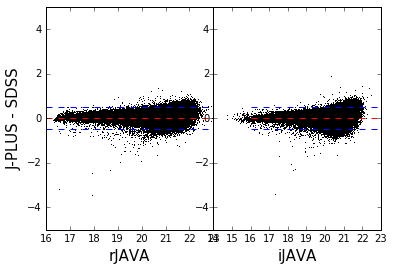

fraction of outliers in rJAVA - rSDSS: 0.003564
fraction of outliers in iJAVA - iSDSS: 0.006175
J-PLUS ELG catalogue loaded


In [5]:
# Cross-match with SDSS


elgdir   = os.getcwd()
fout = '%s/out/elgs.dat' % elgdir
z_oii = [0.73, 0.79]

UseSDSSPhot = True # Use SDSS BB photometry instead of J-PLUS?
AddedPlots = False
AddedPlots2 = True

if AddedPlots or AddedPlots2:
    plt.figure('PlotSDSSPhotometry')
    
    gs = gsc.GridSpec(1,2)
    gs.update(wspace=0.0, hspace=0.0)

    ijlim = -10
    rjlim = -10
    
    if UseSDSSPhot:
        
           
              
       
        
        print 'Cross-match of SDSS phot with J-PLUS ...'
        d,ind = jplus.tools.crossmatch_angular(jp0['coords'],gal_sdss_coords['coords'],max_distance=3e-4)
        m = ((d != np.inf))
        print 'Cross-match in %ld galaxies,\nSDSS: %ld\nnJPLUS: %ld' % (len(m), len(gal_sdss_coords['coords']), 
                                                                        len(jp0['coords']))
        
        jgal = jplus.tools.select_object(jp0, m)

        
        print 'xmatch catalogue contains %ld galaxies' % len(jgal['tile_id'])
        #jplus['in_sdss'] = m
        # Adding SDSS magnitudes
        jgal['rSDSS'] = gal_sdss_r_i['rSDSS'][ind[m]]
        jgal['iSDSS'] = gal_sdss_r_i['iSDSS'][ind[m]]
        jgal['uSDSS'] = gal_sdss_ugz['uSDSS'][ind[m]]
        jgal['gSDSS'] = gal_sdss_ugz['gSDSS'][ind[m]]
        jgal['zSDSS'] = gal_sdss_ugz['zSDSS'][ind[m]]
        
        jgal['rSDSS'][:,1] = gal_sdss_r_i_err['rSDSS'][ind[m],1]
        jgal['iSDSS'][:,1] = gal_sdss_r_i_err['iSDSS'][ind[m],1]
        
        # and their errors ...
#        jgal['rSDSS'][:,1] = gal_sdss_r_i_err['rSDSS'][:,1][ind[m]]
#        jgal['iSDSS'][:,1] = gal_sdss_r_i_err['iSDSS'][:,1][ind[m]]
        
        # Now removing those datasets to save memory
       
        
        nxmatch = len(jgal['rSDSS'][:,0])
        if AddedPlots2:
        
            delta_r = jgal['rJAVA'][:,0] - jgal['rSDSS'][:,0]
            delta_i = jgal['iJAVA'][:,0] - jgal['iSDSS'][:,0]
            
            outliers_r = np.where(np.fabs(delta_r) > .5)[0]
            outliers_i = np.where(np.fabs(delta_i) > .5)[0]
            
            plt.figure('SDSSvsJ-PLUS')
            ax = plt.subplot(gs[0,0])
            ax.plot(jgal['rJAVA'][:,0],delta_r ,',',color='black')
            ax.plot([16,23],[0,0],'--',color='red')
            ax.plot([16,23],[.5,.5],'--',color='blue')
            ax.plot([16,23],[-.5,-.5],'--',color='blue')
            ax.set_ylim([-5,5])
            ax.set_xlabel('rJAVA',fontsize=15)
            ax.set_ylabel('J-PLUS - SDSS',fontsize=15)
            ax = plt.subplot(gs[0,1])
            ax.plot(jgal['iJAVA'][:,0], delta_i, ',',color='black')
            ax.plot([16,23],[0,0],'--',color='red')
            ax.plot([16,23],[.5,.5],'--',color='blue')
            ax.plot([16,23],[-.5,-.5],'--',color='blue')
            ax.set_ylim([-5,5])
            ax.set_xlabel('iJAVA',fontsize=15)
            plt.show()
            
            print 'fraction of outliers in rJAVA - rSDSS: %f' % (len(outliers_r)/(0. + nxmatch))
            print 'fraction of outliers in iJAVA - iSDSS: %f' % (len(outliers_i)/(0. + nxmatch))
        ix = 0
        iy = 0



print 'J-PLUS ELG catalogue loaded'





In [6]:
# Cross-match with SDSS SpecObj

gal_sdss_spec = jplus.datasets.fetch_sdss_objects(mag_type="aperMags",overwrite=False,mag_limit=[16,21], extinction=False,
                                                          clean = True, nchunks = 5, spectroscopic=True, 
                                                    casjobs=True, object_name="galaxies")



print 'Cross-match of SDSS phot with J-PLUS ...'
d,ind = jplus.tools.crossmatch_angular(jp0['coords'],gal_sdss_spec['coords'],max_distance=3e-4)
m = ((d != np.inf))
print 'Cross-match in %ld galaxies,\nSDSS: %ld\nnJPLUS: %ld' % (len(m), len(gal_sdss_spec['coords']), 
                                                                        len(jp0['coords']))
        
j_spec = jplus.tools.select_object(jp0, m)

        
print 'xmatch catalogue contains %ld galaxies' % len(j_spec['tile_id'])
        #jplus['in_sdss'] = m
        # Adding SDSS magnitudes
j_spec['rSDSS'] = gal_sdss_spec['rSDSS'][ind[m]]
j_spec['iSDSS'] = gal_sdss_spec['iSDSS'][ind[m]]
j_spec['uSDSS'] = gal_sdss_spec['uSDSS'][ind[m]]
j_spec['gSDSS'] = gal_sdss_spec['gSDSS'][ind[m]]
j_spec['zSDSS'] = gal_sdss_spec['zSDSS'][ind[m]]
j_spec['zspec'] = gal_sdss_spec['zspec'][ind[m]]

        #jgal['rSDSS'][:,1] = gal_sdss_r_i_err['rSDSS'][ind[m],1]
        #jgal['iSDSS'][:,1] = gal_sdss_r_i_err['iSDSS'][ind[m],1]
        

print gal_sdss_spec.keys()


j-plus [INFO]: Fetching SDSS galaxies
j-plus [INFO]:    Loading /home/CEFCA/aaorsi/photoz/jplus_data/sdss_galaxies_aperMags_magmax21.0.h5


Cross-match of SDSS phot with J-PLUS ...
Cross-match in 5002422 galaxies,
SDSS: 2087487
nJPLUS: 5002422
xmatch catalogue contains 82388 galaxies
['mjd', 'extinction_rSDSS', 'iSDSS', 'extinction_gSDSS', 'gSDSS', 'plate', 'zSDSS', 'PrimTarget', 'fiberID', 'object_id', 'uSDSS', 'rSDSS', 'extinction_iSDSS', 'coords', 'specClass', 'extinction_zSDSS', 'date', 'zspec', 'filename', 'SQL_query', 'extinction_uSDSS']


In [7]:
clean_xmatch = (np.fabs(delta_r) < 2) & (np.fabs(delta_i) < 2) & (jgal['rSDSS'][:,0] < 21) & (jgal['rSDSS'][:,0] > 16) 
jplus_clean = jplus.tools.select_object(jgal, clean_xmatch)

print 'Number of clean xmatches: %ld\nOriginal catalogue has %ld' % (len(jplus_clean['tile_id']), len(jgal['tile_id']))



Number of clean xmatches: 797725
Original catalogue has 1234729


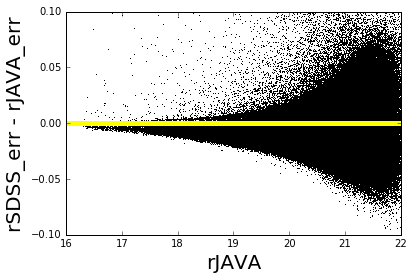

154.1079


In [8]:
plt.figure('Errors')

plt.plot(jgal['rJAVA'][:,0], jgal['rSDSS'][:,1] - jgal['rJAVA'][:,1], 'k,')
plt.xlabel('rJAVA',fontsize=20)
plt.ylabel('rSDSS_err - rJAVA_err',fontsize=20)

plt.xlim([16,22])
plt.ylim([-.1,.1])
plt.plot([0,30],[0,0],linewidth=5,color='yellow')

plt.show()

print np.max(gal_sdss_r_i_err['rSDSS'][:,1])




In [9]:
# Removing databases that are not used any further

RmVar = False

if RmVar:
    del gal_jplus0
    del jp0
    del gal_sdss_r_i
    del gal_sdss_r_i_err
    del jgal0


In [10]:
# Loading Lightcone galaxies
nCone = 512
lcone = []

Mockpath = '/home/CEFCA/aaorsi/work/JPLUS_Mock/new/Lines/'
namelc   = 'LightCone_SA_0_'

print 'reading Lightcone...'
for i in range(nCone): #nCone):
    nameIn = '%s%s%d' % (Mockpath, namelc, i)
    ilc = read.readmock_chunk_PythonCut(nameIn, zspace = True)
    lcone.append(ilc[0])
    
dcone = np.concatenate(lcone)


reading Lightcone...


In [11]:
print dcone.dtype

[('Type', '<i4'), ('Mvir', '<f4'), ('pos', '<f4', (3,)), ('vel', '<f4', (3,)), ('sfr', '<f4'), ('sfr_inst', '<f4'), ('BulgeMass', '<f4'), ('DiskMass', '<f4'), ('Time', '<f4'), ('redshift', '<f4'), ('BlackholeMass', '<f4'), ('MetalColdGas', '<f4'), ('ColdGas', '<f4'), ('MassWeightAge', '<f4'), ('ObsMagDust', '<f4', (12,))]


In [12]:




print 'done'



done


In [13]:
# Loading Convolved spectra

import learn_elgs as learn
tfout = '/home/CEFCA/aaorsi/work/elg_jplus/trainspec.dat'
allspec, photo_spec = learn.LoadSample(tfout,overwrite=False, sdssxjplus=False)



j-plus [INFO]: Fetching  J-PLUS filters


[-0.0072231255252628059, 0.020158269506669296]
[0.30129710948226485, 0.33718768179993419]
[0.34038153202585891, 0.37735007668633419]
[0.74821428150729818, 0.79643110350745117]


In [14]:


print dcone.dtype

f_j0660 = jplus.datasets.fetch_jplus_filter('J0660') # Filter transmission curve

w_oii = 3727.0 # OII rest-frame
z_oii = elg.zline(w_oii, f_j0660.wave, f_j0660.throughput)

w_ha = 6563.0
z_ha = elg.zline(w_ha, f_j0660.wave, f_j0660.throughput)

w_hb = 4861.0
z_hb = elg.zline(w_hb, f_j0660.wave, f_j0660.throughput)

w_oiii = 5007.0
z_oiii = elg.zline(w_oiii, f_j0660.wave, f_j0660.throughput)


print z_oii



j-plus [INFO]: Fetching  J-PLUS filters


[('Type', '<i4'), ('Mvir', '<f4'), ('pos', '<f4', (3,)), ('vel', '<f4', (3,)), ('sfr', '<f4'), ('sfr_inst', '<f4'), ('BulgeMass', '<f4'), ('DiskMass', '<f4'), ('Time', '<f4'), ('redshift', '<f4'), ('BlackholeMass', '<f4'), ('MetalColdGas', '<f4'), ('ColdGas', '<f4'), ('MassWeightAge', '<f4'), ('ObsMagDust', '<f4', (12,))]
[0.7482142815072982, 0.7964311035074512]


Computing 3FM on mocks and J-PLUS ...
done
20.99999
16.38246
[ 16.32653061  16.48979592  16.65306122  16.81632653  16.97959184
  17.14285714  17.30612245  17.46938776  17.63265306  17.79591837
  17.95918367  18.12244898  18.28571429  18.44897959  18.6122449
  18.7755102   18.93877551  19.10204082  19.26530612  19.42857143
  19.59183673  19.75510204  19.91836735  20.08163265  20.24489796
  20.40816327  20.57142857  20.73469388  20.89795918  21.06122449]
[ 0.08968935  0.04171843  0.08358882 ...,  0.08073222  0.0605161
  0.09123534]
dm from doDM [ 0.41576067 -0.11528815 -0.12555674 ..., -0.20433276  0.06629236
 -0.02607478]
[-0.06823292  0.02699201  0.07280351  0.03961909  0.07478678  0.05119043
  0.07220138  0.07160523  0.0751982   0.08619238  0.09512772  0.10138765
  0.10144418  0.10491003  0.11409366  0.11312528  0.11665979  0.11830341
  0.11954208  0.11995491  0.11739028  0.10239652  0.11167256  0.13804124
  0.19224621  0.22889395  0.25754091  0.28275839  0.29986133  0.31079125
  0.32

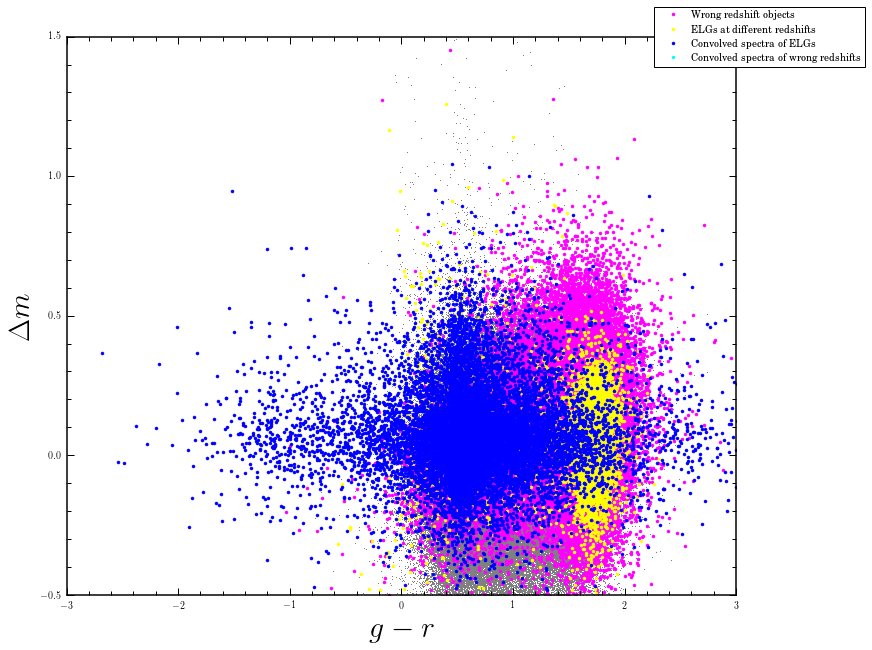

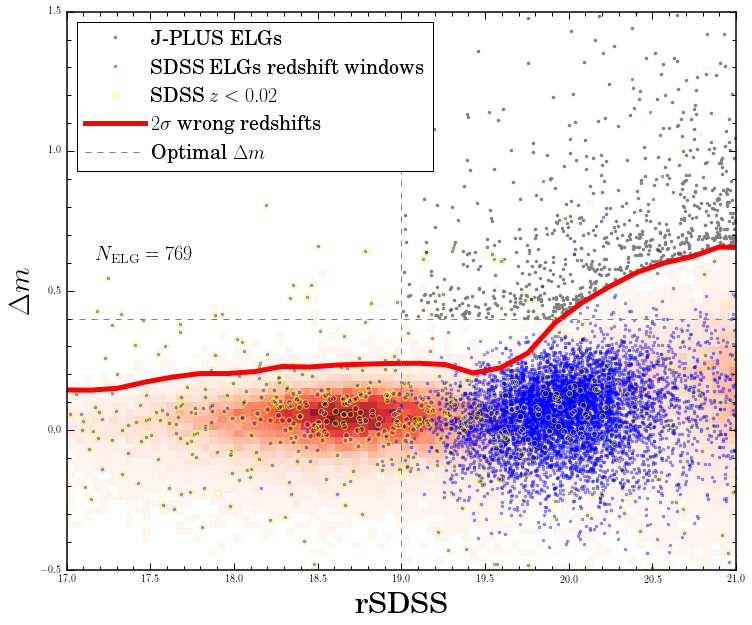

In [18]:
import pdb
from scipy.interpolate import interp1d

# Shortcuts for magnitudes

r_mock     = mtools.app_mag(dcone, 'rSDSS')
g_mock     = mtools.app_mag(dcone, 'gSDSS')
i_mock     = mtools.app_mag(dcone, 'iSDSS')
z_mock     = mtools.app_mag(dcone, 'zSDSS')
j0660_mock     = mtools.app_mag(dcone, 'J0660')
j0861_mock     = mtools.app_mag(dcone, 'J0861')

g_jplus = jplus_clean['gJAVA'][:,0]
r_jplus = jplus_clean['rSDSS'][:,0]
z_jplus = jplus_clean['zJAVA'][:,0]
i_jplus = jplus_clean['iSDSS'][:,0]
j0660_jplus = jplus_clean['J0660'][:,0]
j0861_jplus = jplus_clean['J0861'][:,0]


j0660_spec = photo_spec['J0660'][:,0]
j0861_spec = photo_spec['J0861'][:,0]
r_spec = photo_spec['rJAVA'][:,0]
i_spec = photo_spec['iJAVA'][:,0]
g_spec = photo_spec['gJAVA'][:,0]  # gJAVA, zJAVA are not fully sampled by VIMOS spectra (VVDS, VIPERS)
z_spec = photo_spec['zJAVA'][:,0]  # gJAVA, zJAVA are not fully sampled by VIMOS spectra (VVDS, VIPERS)




# Computing 3FM on each dataset
print 'Computing 3FM on mocks and J-PLUS ...'

dm_mocks = mtools.tfm(dcone,broad_noline='iSDSS')
dm_jplus = mtools.gen_3fm(jplus_clean['J0660'][:,0], jplus_clean['rSDSS'][:,0], 
                          jplus_clean['iSDSS'][:,0],Broad_NoLineName='iSDSS')

dm_java = mtools.gen_3fm(jplus_clean['J0660'][:,0], jplus_clean['rJAVA'][:,0], 
                          jplus_clean['iJAVA'][:,0],Broad_NoLineName='iSDSS')


dm_spec = mtools.gen_3fm(photo_spec['J0660'][:,0], photo_spec['rJAVA'][:,0], 
                          photo_spec['iJAVA'][:,0],Broad_NoLineName='iSDSS')


dm_jspec = mtools.gen_3fm(j_spec['J0660'][:,0], j_spec['rSDSS'][:,0], 
                          j_spec['iSDSS'][:,0],Broad_NoLineName='iSDSS')


nspec = len(allspec)
zsp = np.zeros(nspec)
for i in range(nspec):
    zsp[i] = allspec[i]['z']
    
photo_spec['z'] = zsp

print 'done'

mock_rlim = 21.3


cond_mocks = (dm_mocks > 0.4) & (r_mock > 20)
cond_jplus = (dm_jplus > 0.4) & (jplus_clean['rSDSS'][:,0] > 20) & (~np.isnan(dm_jplus)) & (jplus_clean['rSDSS'][:,0] < mock_rlim)
cond_spec  = (dm_spec > 0.4) & (r_spec > 20)


ELG_zspec = (((j_spec['zspec'] > z_ha[0])   & (j_spec['zspec'] < z_ha[1])   ) |
             ((j_spec['zspec'] > z_hb[0])   & (j_spec['zspec'] < z_hb[1])   ) |
             ((j_spec['zspec'] > z_oiii[0]) & (j_spec['zspec'] < z_oiii[1]) ) |
             ((j_spec['zspec'] > z_oii[0])  & (j_spec['zspec'] < z_oii[1])  )) 


speccat_ELG = (((photo_spec['z'] > z_ha[0])   & (photo_spec['z'] < z_ha[1])   ) |
               ((photo_spec['z'] > z_hb[0])   & (photo_spec['z'] < z_hb[1])   ) |
               ((photo_spec['z'] > z_oiii[0]) & (photo_spec['z'] < z_oiii[1]) ) |
               ((photo_spec['z'] > z_oii[0])  & (photo_spec['z'] < z_oii[1])  )) 


#mock_ELG = 


j_spec_ELGs = jplus.tools.select_object(j_spec, ELG_zspec)
j_spec_noELGs = jplus.tools.select_object(j_spec, ~ELG_zspec)

dm_jELG = mtools.gen_3fm(j_spec_ELGs['J0660'][:,0], j_spec_ELGs['rSDSS'][:,0], 
                          j_spec_ELGs['iSDSS'][:,0],Broad_NoLineName='iSDSS')

dm_jnoELG = mtools.gen_3fm(j_spec_noELGs['J0660'][:,0], j_spec_noELGs['rSDSS'][:,0], 
                          j_spec_noELGs['iSDSS'][:,0],Broad_NoLineName='iSDSS')                         
                         


#m_ha = cond_mocks & (dcone['redshift'] > z_ha[0]) & (dcone['redshift'] < z_ha[1])
#m_hb = cond_mocks & (dcone['redshift'] > z_hb[0]) & (dcone['redshift'] < z_hb[1])
#m_oii = cond_mocks & (dcone['redshift'] > z_oii[0]) & (dcone['redshift'] < z_oii[1])
#m_oiii = cond_mocks & (dcone['redshift'] > z_oiii[0]) & (dcone['redshift'] < z_oiii[1])


plt.figure(111)
plt.rcParams['font.family'] = 'STIXGeneral'
nbins = 50
r_arr = np.linspace(16,24,nbins)
rbin = r_arr[1] - r_arr[0]
pp = np.zeros(nbins)
pp2 = np.zeros(nbins)


rj = jplus_clean['rSDSS'][:,0]
for i in range(nbins):
    sel = np.where((rj > r_arr[i] - rbin/2. ) & (rj < r_arr[i] + rbin/2.))[0]
    dm_r = dm_jplus[sel]
    
    
    if len(dm_r) > 0:
        pp[i] = np.percentile(dm_jplus[sel],84.)
        pp2[i] = np.percentile(dm_java[sel],84)
    
nzero = pp > 0    
#plt.plot(r_arr[nzero],pp[nzero],color='green',linewidth=5)
#plt.plot(r_arr[nzero],pp2[nzero],color='yellow',linewidth=5)
plt.ylim([-1,1])
plt.xlabel('rSDSS',fontsize=30)
plt.ylabel(r'$\Delta m$',fontsize=30)

pline = interp1d(r_arr[nzero],pp[nzero])

print np.max(jplus_clean['rSDSS'][:,0])
print np.min(jplus_clean['rSDSS'][:,0])
print r_arr[nzero]
jplus_clean['dm'] = dm_jplus 
jplus_clean['dmsigma']  = jplus_clean['dm']/(pline(jplus_clean['rSDSS'][:,0]))
mask = jplus_clean['dmsigma'] > 2.0

#elgs = jplus.tools.select_object(jplus_clean, mask)

#plt.plot(elgs['rSDSS'][:,0],elgs['dm'],'r.')

j_spec_ELGs = jplus.tools.select_object(j_spec, ELG_zspec)
j_spec_noELGs = jplus.tools.select_object(j_spec, ~ELG_zspec)

j_spec_ELGs['dm'] = mtools.gen_3fm(j_spec_ELGs['J0660'][:,0], j_spec_ELGs['rSDSS'][:,0], 
                          j_spec_ELGs['iSDSS'][:,0],Broad_NoLineName='iSDSS')

j_spec_noELGs['dm'] = mtools.gen_3fm(j_spec_noELGs['J0660'][:,0], j_spec_noELGs['rSDSS'][:,0], 
                          j_spec_noELGs['iSDSS'][:,0],Broad_NoLineName='iSDSS')


lowz = j_spec['zspec'] < z_ha[1]
lowz_jplus = jplus.tools.select_object(j_spec,lowz)

lowz_jplus['dm'] = mtools.gen_3fm(lowz_jplus['J0660'][:,0], lowz_jplus['rSDSS'][:,0], 
                          lowz_jplus['iSDSS'][:,0],Broad_NoLineName='iSDSS')

wz_r = np.zeros(nbins)
wz = j_spec_noELGs['rSDSS'][:,0]
for i in range(nbins):
    sel = np.where((wz > r_arr[i] - rbin/2. ) & (wz < r_arr[i] + rbin/2.))[0]
    dm_wz = j_spec_noELGs['dm'][sel]
    wz_r[i] = np.percentile(dm_wz,84.) if len(dm_wz) > 0 else -1
        

nzero = wz_r > 0         
wzline = interp1d(r_arr, wz_r)        

maxR = 19.0

err_dm_jplus = mtools.gen_3fm_err(jplus_clean['J0660'][:,0], jplus_clean['J0660'][:,1], jplus_clean['rSDSS'][:,0], jplus_clean['rSDSS'][:,1], 
                          jplus_clean['iSDSS'][:,0], jplus_clean['iSDSS'][:,1],Broad_NoLineName='iSDSS')

mask = ((dm_jplus/wzline(jplus_clean['rSDSS'][:,0]) > 2.0) & 
        (dm_jplus > 0.4) &
        (jplus_clean['rSDSS'][:,0] > maxR) &
        (dm_jplus/err_dm_jplus > 2))

elgs = jplus.tools.select_object(jplus_clean, mask)
elgs['dm'] = dm_jplus[mask]
elgs['err_dm'] = err_dm_jplus[mask]



nelg = len(elgs['dm'])

meanR = np.mean(j_spec_ELGs['rSDSS'][:,0])
mean_specR = np.mean(photo_spec['rJAVA'][:,0])
from matplotlib.colors import LogNorm
corr = meanR - mean_specR

xr = [17,21]
yr = [-.5,1.5]

plt.plot(elgs['rSDSS'][:,0],elgs['dm'],'.', color='gray', label='J-PLUS ELGs')
#c, yb, xb, im = plt.hist2d(jplus_clean['rSDSS'][:,0], dm_jplus, bins=50, range=[xr, yr], cmap=plt.cm.Greys, 
#                          normed=LogNorm(), alpha=0.5)

nonan = (~np.isnan(j_spec_noELGs['dm']))
counts, ybins, xbins, image = plt.hist2d(j_spec_noELGs['rSDSS'][nonan,0], j_spec_noELGs['dm'][nonan], bins=80, 
                                         range=[xr, yr],cmap=plt.cm.Reds, normed=LogNorm(), 
                                         cmin=0.01, label='SDSS wrong redshifts', alpha=0.9)
#plt.plot(j_spec_noELGs['rSDSS'][nonan,0], j_spec_noELGs['dm'][nonan],'.',color='magenta', label='SDSS wrong redshifts')

print 'dm from doDM', j_spec_noELGs['dm'][nonan]

#counts, ybins, xbins, image = plt.hist2d(j_spec_ELGs['rSDSS'][:,0], j_spec_ELGs['dm'], bins=80, 
#                                         range=[xr, yr],cmap=plt.cm.YlGn, normed=LogNorm(), cmin=0.01, alpha=0.3)
plt.plot(j_spec_ELGs['rSDSS'][:,0], j_spec_ELGs['dm'],'.',color='blue', label='SDSS ELGs redshift windows', alpha=.4)
plt.plot(lowz_jplus['rSDSS'][:,0], lowz_jplus['dm'],'o',color='yellow', label=r'SDSS $z < %.2f$'%z_ha[1], alpha=1, fillstyle='none')
print wzline(r_arr)
plt.plot(r_arr, 2*wzline(r_arr), '-', color='red', linewidth=5, label=r'$2\sigma$ wrong redshifts')
plt.plot(xr,[0.4,0.4],'--', color='gray',label=r'Optimal $\Delta m$')
plt.plot([maxR,maxR,],yr,'--', color='gray')
plt.text(xr[0]*1.01, yr[1]*.4, r'$N_{\rm ELG}=%d$'%nelg, fontsize=20)
plt.xlim(xr)
plt.ylim(yr)
plt.legend(fontsize=20, loc='upper left')



# ----

plt.figure('dm vs color')
plt.plot(jplus_clean['gSDSS'][:,0] - jplus_clean['rSDSS'][:,0],dm_jplus,',', color='gray')
plt.plot(j_spec_noELGs['gSDSS'][:,0] - j_spec_noELGs['rSDSS'][:,0], j_spec_noELGs['dm'],'.',color='magenta', label='Wrong redshift objects')
plt.plot(j_spec_ELGs['gSDSS'][:,0] - j_spec_ELGs['rSDSS'][:,0], j_spec_ELGs['dm'],'.',color='yellow', label='ELGs at different redshifts')
plt.plot(photo_spec['gJAVA'][speccat_ELG,0]  - photo_spec['rJAVA'][speccat_ELG,0],dm_jspec[speccat_ELG],'.',color='blue',label='Convolved spectra of ELGs')
plt.plot(photo_spec['gJAVA'][~speccat_ELG,0] - photo_spec['rJAVA'][~speccat_ELG,0],dm_jspec[~speccat_ELG],'.',color='cyan',label='Convolved spectra of wrong redshifts')
plt.ylim([-1,1])
plt.xlabel(r'$g - r$',fontsize=30)
plt.ylabel(r'$\Delta m$',fontsize=30)
plt.xlim([-3,3])
plt.ylim([-.5,1.5])
plt.legend(loc='center right', bbox_to_anchor=(1.2, 1.0))





In [16]:

print allspec[0].keys()
nspec = len(allspec)
zsp = np.zeros(nspec)
for i in range(nspec):
    zsp[i] = allspec[i]['z']
    
photo_spec['z'] = zsp
print photo_spec.keys()





['w', 'flux', 'survey', 'file', 'z', 'name']
['uJAVA', 'gJAVA', 'z', 'iJAVA', 'J0395', 'J0378', 'J0430', 'J0660', 'J0410', 'zJAVA', 'J0515', 'J0861', 'rJAVA']


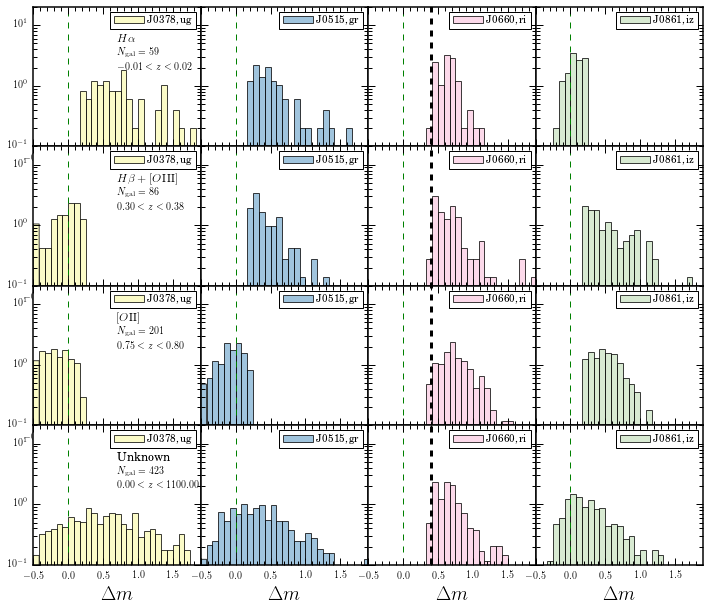

In [50]:
# 3FM for all filters
reload(mtools)
cnames = ['J0378, ug', 'J0515, gr', 'J0660, ri', 'J0861, iz']
cmap = plt.cm.Set3(np.linspace(.1,.9,4))
dm_min = 0.4

dm_J0515 = mtools.gen_3fm(elgs['J0515'][:,0], elgs['gSDSS'][:,0], 
                          elgs['rSDSS'][:,0],Broad_NoLineName='rSDSS', LineFilterName='J0515', Broad_LineName='gSDSS')
err_dm_J0515 = mtools.gen_3fm_err(elgs['J0515'][:,0], elgs['J0515'][:,1], elgs['gSDSS'][:,0], elgs['gSDSS'][:,1], 
                          elgs['rSDSS'][:,0], elgs['rSDSS'][:,1],Broad_NoLineName='rSDSS')


dm_J0378 = mtools.gen_3fm(elgs['J0378'][:,0], elgs['uSDSS'][:,0], 
                          elgs['gSDSS'][:,0],Broad_NoLineName='gSDSS', LineFilterName='J0378', Broad_LineName='uJAVA')
err_dm_J0378 = mtools.gen_3fm_err(elgs['J0378'][:,0], elgs['J0378'][:,1], elgs['uSDSS'][:,0], elgs['uSDSS'][:,1], 
                          elgs['gSDSS'][:,0], elgs['gSDSS'][:,1],Broad_NoLineName='gSDSS')

dm_J0861 = mtools.gen_3fm(elgs['J0861'][:,0], elgs['zSDSS'][:,0], 
                          elgs['iSDSS'][:,0],Broad_NoLineName='iSDSS', LineFilterName='J0861', Broad_LineName='zSDSS')

err_dm_J0861 = mtools.gen_3fm_err(elgs['J0861'][:,0], elgs['J0861'][:,1], elgs['zSDSS'][:,0], elgs['zSDSS'][:,1], 
                          elgs['iSDSS'][:,0], elgs['iSDSS'][:,1],Broad_NoLineName='iSDSS')

dm_J0660     = elgs['dm']
err_dm_J0660 = elgs['err_dm']

dm_st = 1  # minimum deltam / error

noise_dm_J0378 = dm_J0378 / err_dm_J0378 < dm_st
noise_dm_J0515 = dm_J0515 / err_dm_J0515 < dm_st
noise_dm_J0861 = dm_J0861 / err_dm_J0861 < dm_st

#dm_J0378[noise_dm_J0378] = 0
#dm_J0515[noise_dm_J0515] = 0
#dm_J0861[noise_dm_J0861] = 0

plt.figure('dm_hist')
gs2 = gsc.GridSpec(4,4)
gs2.update(wspace=0.0, hspace=0.0)

d_thr = 0.2 # detection threshold

s_ha     = (dm_J0378 > d_thr) & (dm_J0515 > d_thr) & (dm_J0660 > d_thr) & (dm_J0861 < d_thr)
s_hboiii = (dm_J0378 < d_thr) & (dm_J0515 > d_thr) & (dm_J0660 > d_thr) & (dm_J0861 > d_thr)
s_oii    = (dm_J0378 < d_thr) & (dm_J0515 < d_thr) & (dm_J0660 > d_thr) & (dm_J0861 > d_thr)

#z_arr = [zha, zhb, zoiii, zoii]

sel_arr = [s_ha, s_hboiii, s_oii, ~s_ha & ~s_hboiii & ~s_oii]
z_arr   = [z_ha, [np.min([z_hb,z_oiii]), np.max([z_hb, z_oiii])], z_oii, [0,1100]]
str_arr = [r'$H\alpha$', r'$H\beta+[O\textsc{iii}]$',r'$[O\textsc{ii}]$', r'Unknown']
for j in range(len(sel_arr)):
    sj = sel_arr[j]
    mj = [dm_J0378[sj], dm_J0515[sj], dm_J0660[sj], dm_J0861[sj]]
    for i in range(len(mj)):
        ax2 = plt.subplot(gs2[j,i])    
        ax2.hist(mj[i],bins= 30, label=cnames[i], facecolor=cmap[i],normed=True,range=[-.5,2],alpha=0.75, log=True)
        ax2.set_ylim([1e-1,20])
        ax2.set_xlim([-.5, 1.9])
        
        if i == 0:
            ax2.text(0.5,0.75, str_arr[j],fontsize=12, transform=ax2.transAxes)
            ax2.text(0.5,0.65, r'$N_{\rm gal}=%d$'%len(mj[i]), fontsize=10, transform=ax2.transAxes)
            ax2.text(0.5,0.55,r'$%.2f<z<%.2f$'% (z_arr[j][0], z_arr[j][1]), fontsize=10, transform=ax2.transAxes)
        
        ax2.legend()
        if i > 0:
            ax2.set_yticklabels([])
        
        ax2.plot([0,0], [1e-3,100],'--')
        if i == 2:
            ax2.plot([dm_min, dm_min], [-1,100],'--',linewidth=3,color='black')
        ax2.set_xlabel(r'$\Delta m$',fontsize=20)
    
    
    
plt.show()






[ 1.89835262  0.          0.8350112   0.63935085  0.          0.25678422
  0.33609203  0.          0.          1.82330327  0.          0.38515159
  0.          0.          0.          0.42681572  0.          0.          0.3836429
  0.          0.          0.43477456  0.40601229  0.16213963  0.53853483
  0.46805883  0.28750477  0.61207061  0.28341792  0.79911923  0.55554725
  0.39998132  0.32253738  0.80511619  0.          0.          0.47219612
  0.          0.          0.99875678  0.          0.          0.
  0.62222261  0.62807544  0.6445795   1.18998439  0.          0.78113653
  0.          0.33665194  1.73531351  1.32924638  0.52369972  0.          0.
  0.          0.28182206  0.27320862  0.          0.          0.
  1.07859557  0.          0.88431136  1.21377823  0.          0.61700472
  0.          0.71757043  0.28885558  0.47849157  0.44085657  0.
  0.92965274  0.          0.          0.27102113  0.34013681  0.          0.
  1.08466295  0.57737892  0.          0.          1.5715

In [17]:
# Computing errors in the 3FM

reload(mtools)


# Error from propagation:
err_dm_jplus = mtools.gen_3fm_err(jplus_clean['J0660'][:,0], jplus_clean['J0660'][:,1], jplus_clean['rSDSS'][:,0], jplus_clean['rSDSS'][:,1], 
                          jplus_clean['iSDSS'][:,0], jplus_clean['iSDSS'][:,1],Broad_NoLineName='iSDSS')


# Error from Monte-Carlo:



Nsamp = 500
Niter = 20


shuff_ind = np.random.permutation(range(len(jplus_clean['J0660'][:,0])))[0:Nsamp]
err_MC = np.zeros(Nsamp)
print 'running MC ...'
for i in range(Nsamp):
    idd = shuff_ind[i]
    _j0660 = jplus_clean['J0660'][idd,:]
    _r     = jplus_clean['rSDSS'][idd,:]
    _i     = jplus_clean['iSDSS'][idd,:]
    
    #err_j0660 = np.random.normal(0, _j0660[1],Niter)
    #err_r     = np.random.normal(0, _r[1],Niter)
    #err_i     = np.random.normal(0, _i[1],Niter)
    
    err_MC[i] = np.std([mtools.gen_3fm(_j0660[0]+ np.random.normal(0,_j0660[1]), _r[0] + np.random.normal(0,_r[1]), 
                          _i[0] + np.random.normal(0,_i[1]),Broad_NoLineName='iSDSS') for j in range(Niter)])
    
        
    if i%100 == 0:
        print '%.1f percent done' % (float(i)/Nsamp*100)
        
print 'done!'



[ 0.08968935  0.04171843  0.08358882 ...,  0.08073222  0.0605161
  0.09123534]
running MC ...
0.0 percent done
20.0 percent done
40.0 percent done
60.0 percent done
80.0 percent done
done!


In [18]:
#    err_j0660 = np.random.normal(0, _j0660[1],Niter)
#    err_r     = np.random.normal(0, _r[1],Niter)
#    err_i     = np.random.normal(0, _i[1],Niter)
    
#    _err = np.zeros(Niter)
#    for j in range(Niter):
#        _err[j] = mtools.gen_3fm(_j0660[0]+ err_j0660[j], _r[0] + err_r[j], 
#                          _i[0] + err_i[j],Broad_NoLineName='iSDSS') 
#    err_MC[i] = np.std(_err[j])


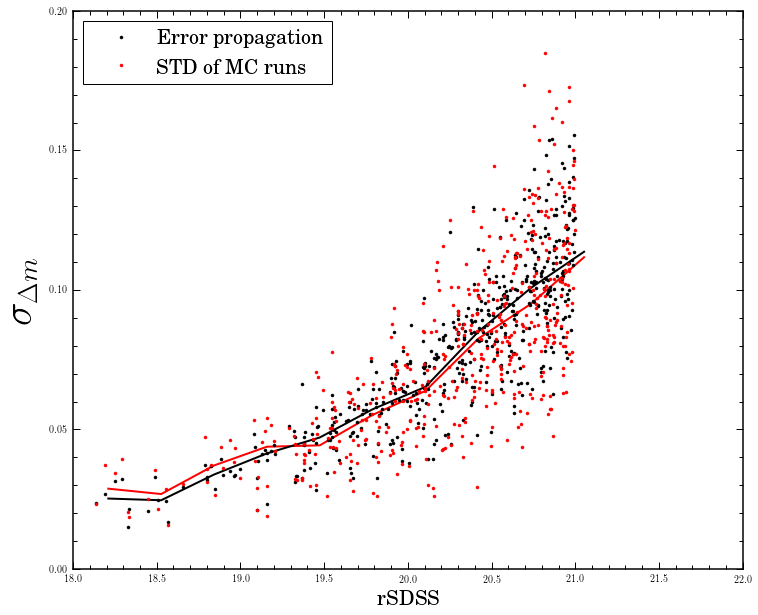

In [19]:
plt.figure('Errors in delta-m')


nbins = 20
r_arr = np.linspace(16,22,nbins)
bsize = r_arr[1] - r_arr[0]
med_errstd = np.zeros(nbins)
med_errprop = np.zeros(nbins)

for ii in range(nbins):
    s_ = (jplus_clean['rSDSS'][shuff_ind,0] < r_arr[ii]+bsize/2.) & (jplus_clean['rSDSS'][shuff_ind,0] > r_arr[ii]-bsize/2.)
    
    ns = len(np.where(s_)[0])
    
    if ns > 3:
        med_errstd[ii] = np.median(err_MC[s_])
        med_errprop[ii] = np.median(err_dm_jplus[shuff_ind[s_]])


nz1 = med_errstd> 0
nz2 = med_errprop > 0

plt.plot(r_arr[nz1], med_errstd[nz1], '-', color='red',linewidth=2)
plt.plot(r_arr[nz2], med_errprop[nz2], '-', color='black',linewidth=2)

plt.plot(jplus_clean['rSDSS'][shuff_ind,0], err_dm_jplus[shuff_ind],'.', color='black',label='Error propagation')
plt.plot(jplus_clean['rSDSS'][shuff_ind,0], err_MC,'.', color='red',label='STD of MC runs')
plt.legend(loc='upper left',fontsize=20)

plt.xlabel('rSDSS',fontsize=20)
plt.ylabel(r'$\sigma_{\Delta m}$',fontsize=40)
plt.xlim([18,22])
plt.ylim([0.,0.2])


#print err_dm_jplus[shuff_ind]
#print err_MC
plt.show()
        





[ 0.08968935  0.04171843  0.08358882 ...,  0.08073222  0.0605161
  0.09123534]
[ 0.1132623   0.05459288  0.10475689 ...,  0.09119618  0.07156616
  0.10116834]


(16, 21)

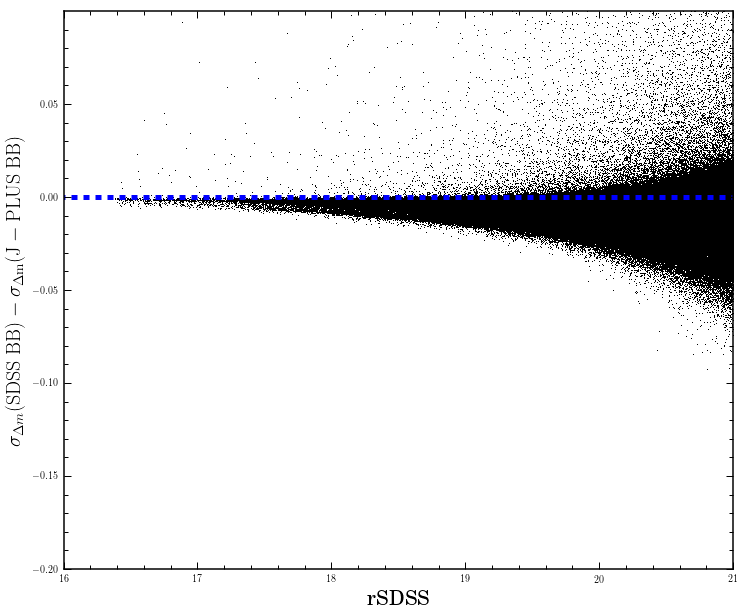

In [92]:
# Compare errors in dm from J-PLUS photometry vs. SDSS photometry


dm_sdss_err = mtools.gen_3fm_err(jplus_clean['J0660'][:,0], jplus_clean['J0660'][:,1], jplus_clean['rSDSS'][:,0], jplus_clean['rSDSS'][:,1], 
                          jplus_clean['iSDSS'][:,0], jplus_clean['iSDSS'][:,1],Broad_NoLineName='iSDSS')

dm_jplus_err = mtools.gen_3fm_err(jplus_clean['J0660'][:,0], jplus_clean['J0660'][:,1], jplus_clean['rJAVA'][:,0], jplus_clean['rJAVA'][:,1], 
                          jplus_clean['iJAVA'][:,0], jplus_clean['iJAVA'][:,1],Broad_NoLineName='iSDSS')

plt.figure('errors comparison')

pr = [0.,0.4]
plt.plot(jplus_clean['rSDSS'][:,0],dm_sdss_err-dm_jplus_err,',',color='black')
plt.plot([15,25],[0,0], '--', linewidth=5,color='blue')
plt.xlabel('rSDSS',fontsize=20)
plt.ylabel(r'$\sigma_{\Delta m}(\rm SDSS~BB)-\sigma_{\Delta m}(\rm J-PLUS~BB)$',fontsize=20)
plt.ylim([-.2,.1])
plt.xlim([16,21])


In [20]:
reload(mtools)

err_dm_jplus = mtools.gen_3fm_err(jplus_clean['J0660'][23,0], jplus_clean['J0660'][23,1], jplus_clean['rSDSS'][23,0], jplus_clean['rSDSS'][23,1], 
                          jplus_clean['iSDSS'][23,0], jplus_clean['iSDSS'][23,1],Broad_NoLineName='iSDSS')


print err_dm_jplus


0.0734608035584
0.0734608035584


In [21]:
print 1222%10


2


20.99999
16.38246


(-1, 1)

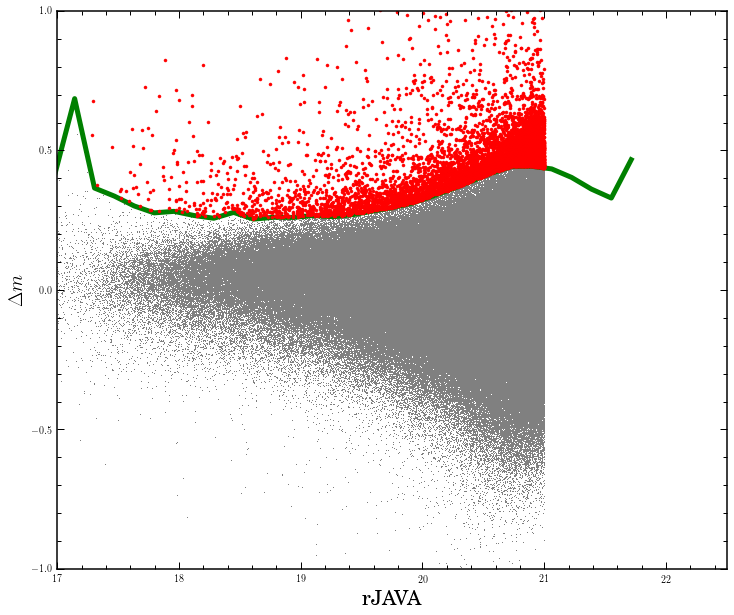

In [22]:


plt.figure(111)
nbins = 50
r_arr = np.linspace(16,24,nbins)
rbin = r_arr[1] - r_arr[0]
pp = np.zeros(nbins)
plt.plot(jplus_clean['rSDSS'][:,0],dm_jplus,',', color='gray')

rj = jplus_clean['rJAVA'][:,0]
for i in range(nbins):
    sel = np.where((rj > r_arr[i] - rbin/2. ) & (rj < r_arr[i] + rbin/2.))[0]
    dm_r = dm_jplus[sel]
    if len(dm_r > 10):
        pp[i] = np.percentile(dm_r,99.)
    
nzero = pp > 0    
plt.plot(r_arr[nzero],pp[nzero],color='green',linewidth=5)
plt.ylim([-2,2])
plt.xlabel('rJAVA',fontsize=20)
plt.ylabel(r'$\Delta m$',fontsize=20)

pline = interp1d(r_arr[nzero],pp[nzero])

print np.max(jplus_clean['rSDSS'][:,0])
print np.min(jplus_clean['rSDSS'][:,0])
jplus_clean['dm'] = dm_jplus 
jplus_clean['dmsigma']  = jplus_clean['dm']/(pline(jplus_clean['rSDSS'][:,0]))
mask = jplus_clean['dmsigma'] > 1.0

elgs = jplus.tools.select_object(jplus_clean, mask)

plt.plot(elgs['rSDSS'][:,0],elgs['dm'],'r.')

plt.xlim([17,22.5])
plt.ylim([-1,1])


In [23]:
# Find Outliers with huge flux excess in J0660

bright = np.where((jplus_clean['dmsigma'] > 1.0) & (jplus_clean['rSDSS'][:,0] < 19))[0]
print bright

for b in bright:
    print b
    gal = jplus_clean
    print "http://upad.cefca.es/catalogues/jplus-v02/object_query.html?image=%s&number=%s"%(str(np.int(gal['tile_id'][b])),str(np.int(gal['object_id'][b])))
    #print gal['coords'][b]
    #print gal[]
    ##jplus.tools.inspect_object(jplus.tools.select_object(gal_elgs,b))



[   706    720    772   1364   3481   4676   9522  11240  12257  19943
  27460  27470  28763  29026  29040  29060  29670  29871  30128  30686
  30703  30778  30781  30788  30914  31176  31670  31943  32856  33397
  34596  34597  40881  42638  44698  46339  47142  55687  65494  66042
  66483  66492  67854  68785  69030  70609  71892  74775  76457  81716
  82885  82896  89795  94833  95821 107601 108146 108225 108246 108298
 109001 109044 109489 109490 119952 120089 139343 144594 146008 147015
 147573 147600 148133 148905 151307 157686 158639 158921 162338 166217
 175927 176624 178425 184982 185296 186305 186744 187945 187987 188440
 189174 189313 189514 189542 191641 191647 193378 194161 198083 198424
 217255 226062 226180 226524 227453 227699 228988 229422 231932 242758
 252161 254728 256395 264867 266371 267605 268358 268375 268388 268599
 269111 272258 273289 279019 292652 295555 298537 302535 303098 303998
 305230 306285 306832 308852 309021 309107 312130 312217 314209 315130
 32169

In [24]:
# Cross-match with ALHAMBRA catalogue

print 'Reading and performing cross-match with ALHAMBRA objects'
import deepdish as dd
AlhambraFile = '/home/CEFCA/aaorsi/work/alhambra/Alhambra.hdf5'

alh = dd.io.load(AlhambraFile)
print alh.keys()


alh_d,alh_ind = jplus.tools.crossmatch_angular(jplus_clean['coords'],alh['coords'],max_distance=3e-4)
alh_m = ((alh_d != np.inf))

jp_alh = jplus.tools.select_object(jplus_clean, alh_m)


print 'Cross match between Alhambra and J-PLUS results in %ld objects' % len(jp_alh['tile_id'])

# Cross match with ELG selection.... 
alh_d2, alh_ind2 = jplus.tools.crossmatch_angular(elgs['coords'],alh['coords'], max_distance=3e-4)
mask = ((alh_d2 != np.inf))

elg_xalha = jplus.tools.select_object(elgs, mask)
alha_xelg = jplus.tools.select_object(alh, alh_ind2[mask])



elg_xalha['zphoto'] = alha_xelg['zphoto']

# z_elgs_alh = zph_alh[alh_ind2[alh_m2]]
# dm_alh = dm_jplus[alh_m2]
# jp_alh2['dm'] = dm_alh
#jp_alh2['z'] = z_elgs_alh

# alh_cstar = np.asarray(alh['cstar'])
# jp_alh2['alh_cstar'] = alh_cstar[alh_ind2[alh_m2]]

print 'Cross match between Alhambra and J-PLUS ELGs results in %ld objects' % len(elg_xalha['tile_id'])
#alh.keys()


Reading and performing cross-match with ALHAMBRA objects
['F830W', 'F814W', 'F799W', 'F644W', 'F892W', 'F954W', 'F582W', 'zphoto', 'F427W', 'F675W', 'F551W', 'F768W', 'F365W', 'F706W', 'F458W', 'cstar', 'F489W', 'F861W', 'F923W', 'coords', 'F613W', 'F396W', 'F737W', 'F520W']
Cross match between Alhambra and J-PLUS results in 938 objects
Cross match between Alhambra and J-PLUS ELGs results in 7 objects


http://upad.cefca.es/catalogues/jplus-v02/object_query.html?image=26211&number=7566
Redshift in Alhambra 0.363
CSTAR in Alhambra 0.03, in JPLUS 0.003605
[[ 214.22571246   52.74545799]
 [ 243.26113761   54.63435872]
 [ 243.26877109   54.59470851]
 [ 213.4077298    52.80876595]
 [ 213.56977568   52.74812238]
 [ 213.7110186    52.71671257]
 [ 243.73748764   54.58898717]]
http://upad.cefca.es/catalogues/jplus-v02/object_query.html?image=26241&number=23888
Redshift in Alhambra 0.454
CSTAR in Alhambra 0.03, in JPLUS 0.180908
[[ 214.22571246   52.74545799]
 [ 243.26113761   54.63435872]
 [ 243.26877109   54.59470851]
 [ 213.4077298    52.80876595]
 [ 213.56977568   52.74812238]
 [ 213.7110186    52.71671257]
 [ 243.73748764   54.58898717]]
http://upad.cefca.es/catalogues/jplus-v02/object_query.html?image=26241&number=24714
Redshift in Alhambra 0.326
CSTAR in Alhambra 0.04, in JPLUS 0.033081
[[ 214.22571246   52.74545799]
 [ 243.26113761   54.63435872]
 [ 243.26877109   54.59470851]
 [ 213.407

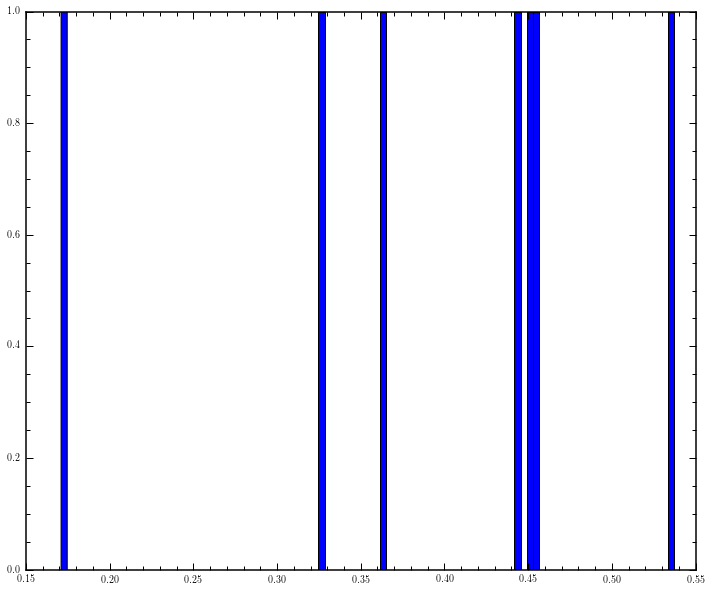

In [25]:

for b in range(len(elg_xalha['tile_id'])):
    print "http://upad.cefca.es/catalogues/jplus-v02/object_query.html?image=%s&number=%s"%(str(np.int(elg_xalha['tile_id'][b])),str(np.int(elg_xalha['object_id'][b])))
    print "Redshift in Alhambra {0}".format(elg_xalha['zphoto'][b])
    print "CSTAR in Alhambra {0}, in JPLUS {1}".format(alha_xelg['cstar'][b], elg_xalha['cstar'][b])
    print elg_xalha['coords']
    
plt.figure()
plt.hist(elg_xalha['zphoto'], bins=100)
plt.show()

In [26]:
jp_alh2['in_sdss']
import strings 
alhambra_flist = [u'F365W',
 u'F396W',
 u'F427W',
 u'F458W',
 u'F489W',
 u'F520W',
 u'F551W',
 u'F582W',
 u'F613W',
 u'F644W',
 u'F675W',
 u'F706W',
 u'F737W',
 u'F768W',
 u'F799W',
 u'F814W',
 u'F830W',
 u'F861W',
 u'F892W',
 u'F923W',
 u'F954W']

nfilt = len(alhambra_flist)

w_alhambra = np.zeros(nfilt)
for i in range(nfilt):
    w_alhambra[i] = str.



SyntaxError: invalid syntax (<ipython-input-26-52697d52804b>, line 29)

In [ ]:

plt.figure(666)
plt.hist(z_jp_alh,bins=100)
plt.xlabel('redshift',fontsize=20)
plt.title('redshift distribution of Alhambra galaxies in J-PLUS',fontsize=25)


cmap = plt.cm.Reds(np.linspace(0.25,0.99,len(z_jp_alh)))

plt.figure(667)
plt.scatter(jp_alh['rJAVA'][:,0], f814_alh[alh_ind[alh_m]], c=z_jp_alh,cmap=plt.cm.Reds)
plt.colorbar()
plt.xlabel('rJAVA', fontsize=20)
plt.ylabel('F814W',fontsize=20)


sel = (jp_alh2['alh_cstar'] < 0.3) & (dm_alh > 0.4)

#######

plt.figure(668)
plt.hist(z_elgs_alh[sel],bins=100)
plt.xlabel('redshift',fontsize=20)
plt.title('redshift distribution of Alhambra galaxies in J-PLUS ELG candidates',fontsize=25)


plt.figure(669)
plt.plot(dm_alh,z_elgs_alh,'o')
plt.xlabel(r'$\Delta m$',fontsize=20)
plt.ylabel(r'redshift',fontsize=20)


ha_jp = (z_elgs_alh >= z_ha[0]) & (z_elgs_alh <= z_ha[1])
hb_jp = (z_elgs_alh >= z_hb[0]) & (z_elgs_alh <= z_hb[1])
oiii_jp = (z_elgs_alh >= z_oiii[0]) & (z_elgs_alh <= z_oiii[1])
oii_jp = (z_elgs_alh >= z_oii[0]) & (z_elgs_alh <= z_oii[1])

print z_ha
print ha_jp
print z_oii
print oii_jp
print z_oiii
print oiii_jp
print z_elgs_alh

plt.figure(670)

plt.plot(g_jplus[alh_m2] - r_jplus[alh_m2], r_jplus[alh_m2]-z_jplus[alh_m2],'.',color='darkgray')

plt.plot(jp_alh2['gJAVA'][ha_jp,0] - jp_alh2['rJAVA'][ha_jp,0], 
         jp_alh2['rJAVA'][ha_jp,0]-jp_alh2['zJAVA'][ha_jp,0],
         'o',color='red',label=r'$H\alpha\lambda 6562')

plt.plot(jp_alh2['gJAVA'][oii_jp,0] - jp_alh2['rJAVA'][oii_jp,0], 
         jp_alh2['rJAVA'][oii_jp,0]-jp_alh2['zJAVA'][oii_jp,0],
         'o',color='blue',label=r'$[OII]\lambda 3727')

plt.plot(jp_alh2['gJAVA'][hb_jp,0] - jp_alh2['rJAVA'][hb_jp,0], 
         jp_alh2['rJAVA'][hb_jp,0]-jp_alh2['zJAVA'][hb_jp,0],
         'o',color='green',label=r'$H\beta\lambda 4861')


plt.plot(jp_alh2['gJAVA'][oiii_jp,0] - jp_alh2['rJAVA'][oiii_jp,0], 
         jp_alh2['rJAVA'][oiii_jp,0]-jp_alh2['zJAVA'][oiii_jp,0],
         'o',color='magenta',label=r'$[OIII] \lambda 5007')


plt.xlabel(r'$g - r$',fontsize=20)
plt.ylabel(r'$r - z$',fontsize=20)
plt.xlim([0,3])
plt.ylim([-1,3])

plt.legend()



In [ ]:
# Find Outliers in cross match with ALHAMBRA

#bright = np.where((z_jp_alh > 2) & (jp_alh['rJAVA'][:,0] < 20))[0]
bright = np.arange(len(jp_alh2['tile_id']))
print bright

for b in bright:
    gal = jp_alh2
    print "http://upad.cefca.es/catalogues/jplus-v02/object_query.html?image=%s&number=%s"%(str(np.int(gal['tile_id'][b])),str(np.int(gal['object_id'][b])))
    print gal['coords'][b]
    print gal['dm'][b]
    print gal['z_alh'][b]
    print gal['alh_cstar'][b]
    print gal['in_sdss'][b]
    
    #jplus.tools.inspect_object(jplus.tools.select_object(gal,b))


In [ ]:
# Compare Alhambra and J-PLUS photometry





In [ ]:
print photo_spec.keys()

plt.figure(4)

dm_bins = np.arange(0.4, 3., 0.05)

plt.hist(dm_spec[cond_spec],bins=dm_bins, label='spectroscopy', normed=True, alpha=0.75)
plt.hist(dm_mocks[cond_mocks],dm_bins,normed=True,facecolor='green',label='Mocks', alpha=0.75)
plt.hist(dm_jplus[cond_jplus],dm_bins,normed=True,facecolor='red',alpha=0.35,label='J-PLUS', log=True)
plt.xlim([0,3])
plt.ylim([1e-2, 2e1])
plt.xlabel(r'$\Delta m$', fontsize=20)
plt.legend(loc='upper right', fontsize=20)


plt.figure(5)
plt.plot(r_jplus[cond_jplus]-j0660_jplus[cond_jplus],i_jplus[cond_jplus]-j0660_jplus[cond_jplus],',',color='green', label='J-PLUS')
plt.plot(r_mock[cond_mocks]-j0660_mock[cond_mocks],i_mock[cond_mocks]-j0660_mock[cond_mocks],'.',color='blue', label='Lightcone')
plt.plot(r_spec[cond_spec]-j0660_spec[cond_spec],i_spec[cond_spec]-j0660_spec[cond_spec],'.',color='magenta',label='Spectra')

plt.xlabel('r-j0660',fontsize=20)
plt.ylabel('i-j0660',fontsize=20)
plt.legend(fontsize=20)


plt.figure(6)

plt.plot(r_jplus[cond_jplus],i_jplus[cond_jplus],',',color='green')
plt.plot(r_mock[cond_mocks],i_mock[cond_mocks],'.',color='blue')
plt.plot(r_spec[cond_spec],i_spec[cond_spec],'.',color='magenta')

plt.figure(8)

plt.plot(r_jplus[cond_jplus]-i_jplus[cond_jplus],j0660_jplus[cond_jplus]-j0861_jplus[cond_jplus],',',color='green', label='J-PLUS')
plt.plot(r_mock[cond_mocks]-i_mock[cond_mocks],j0660_mock[cond_mocks]-j0861_mock[cond_mocks],'.',color='blue', label='Mock')
plt.plot(r_spec[cond_spec]-i_spec[cond_spec],j0660_spec[cond_spec]-j0861_spec[cond_spec],'.',color='magenta',label='Spectra')

#plt.plot(r_mock[m_ha]-i_mock[m_ha],j0660_mock[m_ha]-j0861_mock[m_ha],'o',color='black', label=r'$H\alpha~{\rm Mock}$')
#plt.plot(r_mock[m_hb]-i_mock[m_hb],j0660_mock[m_hb]-j0861_mock[m_hb],'o',color='darkgray', label=r'$H\beta~{\rm Mock}$')
#plt.plot(r_mock[m_oii]-i_mock[m_oii],j0660_mock[m_oii]-j0861_mock[m_oii],'o',color='lightgray', label=r'[O \textsc{ii}] Mock')
plt.xlabel('r - i',fontsize=20)
plt.ylabel('J0660 - J0861',fontsize=20)
plt.xlim([-0.5,2])
plt.ylim([-3,2])
plt.legend()

plt.figure(9)

plt.plot(r_jplus[cond_jplus],j0660_jplus[cond_jplus]-j0861_jplus[cond_jplus],',',color='green', label='J-PLUS')
plt.plot(r_mock[cond_mocks],j0660_mock[cond_mocks]-j0861_mock[cond_mocks],'.',color='blue', label='Mock')
plt.plot(r_spec[cond_spec],j0660_spec[cond_spec]-j0861_spec[cond_spec],'.',color='magenta',label='Spectra')
plt.xlabel('r ',fontsize=20)
plt.ylabel('J0660 - J0861',fontsize=20)
plt.xlim([20,22])
plt.ylim([-3,2])
plt.legend()



In [ ]:
len(allspec)

In [ ]:
# Test on EDR



UseSDSSPhot = True # Use SDSS BB photometry instead of J-PLUS?
AddedPlots = True


plt.figure('PlotSDSSPhotometry_EDAM')
import matplotlib.gridspec as gsc
gs = gsc.GridSpec(3,2)
gs.update(wspace=0.0, hspace=0.0)

mag_excess = "AND (m.MAG_APER_3_0[jplus::rSDSS]- m.MAG_APER_3_0[jplus::J0660]) > 0"
gal_jplus = jplus.datasets.fetch_jplus_stars(mag_type="aper6Mags", overwrite=False, 
                                                 mag_limit=[16,21],
                                                db='edr')
    
if UseSDSSPhot:
    gal_sdss  = jplus.datasets.fetch_sdss_stars(mag_type="modelMags",overwrite=False,mag_limit=[16,24],nchunks=10)
    print 'Replacing J-PUS BBs with SDSS BBs...'
    d2,ind2 = jplus.tools.crossmatch_angular(gal_jplus['coords'],gal_sdss['coords'],max_distance=3e-4)
    m2 = ((d2 != np.inf))
   
#    plt.figure(99)
#    plt.plot(gal_jplus['rJAVA'][m2,0] - gal_jplus['iJAVA'][m2,0],
#             gal_sdss['rSDSS'][ind2[m2],0] - gal_sdss['iSDSS'][ind2[m2],0],',')
#    plt.xlim([-2,2])
#    plt.ylim([-2,2])
#    plt.plot([-2,2],[-2,2],'--')
#    plt.show()

    ix = 0
    iy = 0
    for f_jplus, f_sdss in zip(jplus.datasets.jplus_filter_names(only_bb = True), jplus.datasets.sdss_filter_names()):
        if AddedPlots:
            ax = plt.subplot(gs[ix,iy]) 
            print f_jplus, f_sdss
            ax.plot(gal_jplus[f_jplus][m2,0][0::5], 
                gal_sdss[f_sdss][ind2[m2],0][0::5]-gal_jplus[f_jplus][m2,0][0::5],'.',
                color='black')
            ax.text(0.15,0.75,f_jplus,transform=ax.transAxes,fontsize=18)
            ax.set_xlim([16.1,23])
            ax.set_ylim([-.5,.5])
            ax.plot([16,23],[0,0],'--',color='black')
            if iy >0:
                ax.set_yticklabels([])
                
            ix += 1                
            if ix == 3:
                iy += 1
                ix = 0
                    
            plt.draw()    
      
        gal_jplus[f_jplus][m2,:] = gal_sdss[f_sdss][ind2[m2],:]
        
    print 'Done replacing filters'


